In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [4]:
pd.set_option('display.max_columns', None)

---

## Load Data

100,000 Entries with 28 columns

In [5]:
df = pd.read_csv('data/credit_raw.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_5169/606350316.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/credit_raw.csv')


In [6]:
# Checking duplicates before we start :)

df.duplicated().sum()

0

---

## 1. Pooled Data to Cross-Section Data (Get rid of time-series)

In [7]:
# Drop 'Month' column

df.drop(columns='Month', inplace=True)
df.shape

(100000, 27)

Must drop all variables that are related to time-series (Monthly influenced data)

'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Payment_of_Min_Amount', 

'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'

In [8]:
df.drop(columns=['Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Payment_of_Min_Amount',
                 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
                 inplace=True)


In [9]:
df.columns

Index(['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Credit_Score'],
      dtype='object')

---

## 2. Drop Idenfication Variables

Drop 4 Columns : 'ID', 'Customer_ID', 'Name', 'SSN'



In [10]:
df.drop(columns= ['ID', 'Customer_ID', 'Name', 'SSN'], inplace=True)
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Credit_Score'],
      dtype='object')

---

## 3. Drop Null Values

In [11]:
df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Credit_Score                    0
dtype: int64

#### Before we drop the rows with null values drop the unnecessary variables (with null values)

In [12]:
df.Type_of_Loan.unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [13]:
# Drop the column since we have Num_of_Loan

df.drop(columns='Type_of_Loan', inplace=True)
df.shape

(100000, 15)

The other variables seem important...

In [14]:
df.dropna(inplace=True)
df.shape

(82950, 15)

In [15]:
# Reset Index (Rows have been manipulated)

df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=82950, step=1)

---

## 4. Age


In [16]:
# Seems like there are wrong values

df.Age.nunique()

1534

In [17]:
# Type should be integer, but it's a string (object)

df.Age.dtype

dtype('O')

In [18]:
# Extract only the numbers and change the type to integer.

df.Age = df.Age.map(lambda x: int(''.join(re.findall(r'\d+', x))))
df.Age.head()

0     23
1    500
2     23
3     23
4     23
Name: Age, dtype: int64

In [19]:
df.Age.value_counts(normalize=True, bins=5)

(5.3149999999999995, 1750.8]    0.984882
(5224.4, 6961.2]                0.003990
(3487.6, 5224.4]                0.003797
(1750.8, 3487.6]                0.003713
(6961.2, 8698.0]                0.003617
Name: Age, dtype: float64

In [20]:
print(df.Age.min())
print(df.Age.max())

14
8698


In [21]:
# Observations with age under 21 should be considered wrong data => Based on jobs, credit history age, etc.

df.loc[df.Age<21].shape

(11376, 15)

In [22]:
# Age is higher than 20 and lower than 100

print(df.loc[df.Age>=100].shape)
df = df.loc[(df.Age>20) & (df.Age<=100)]
df.reset_index(drop=True, inplace=True)
print(df.shape)

(2324, 15)
(69251, 15)


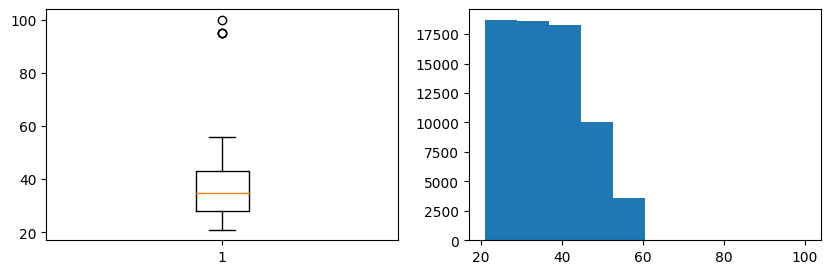

In [23]:
# Looks good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Age)

plt.subplot(1, 2, 2)
plt.hist(df.Age)

plt.show()

---

## 5. Occupation

In [24]:
# 631 null values.

df.Occupation.value_counts()

_______          4882
Lawyer           4602
Mechanic         4412
Scientist        4397
Accountant       4375
Architect        4354
Entrepreneur     4311
Developer        4294
Journalist       4271
Media_Manager    4262
Doctor           4255
Engineer         4244
Teacher          4189
Musician         4169
Writer           4139
Manager          4095
Name: Occupation, dtype: int64

In [25]:
# Drop null values

df = df.loc[df.Occupation != '_______']
df.shape

(64369, 15)

In [26]:
# Reset Index (Rows have been manipulated)

df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=64369, step=1)

---

## 6. Annual_Income

In [27]:
# Leave only the numbers and decimal point
# Round it to integer

df.Annual_Income = df.Annual_Income.map(lambda x: int(float(''.join(re.findall(r'\d+\.\d+', x)))))
df.Annual_Income

0        19114
1        19114
2        19114
3        19114
4        34847
         ...  
64364    39628
64365    39628
64366    39628
64367    39628
64368    39628
Name: Annual_Income, Length: 64369, dtype: int64

In [28]:
# Outliers

df.Annual_Income.value_counts(normalize=True, bins=5)

(-17185.057, 4845217.2]     0.991782
(19359850.8, 24198062.0]    0.002346
(14521639.6, 19359850.8]    0.002206
(9683428.4, 14521639.6]     0.001926
(4845217.2, 9683428.4]      0.001740
Name: Annual_Income, dtype: float64

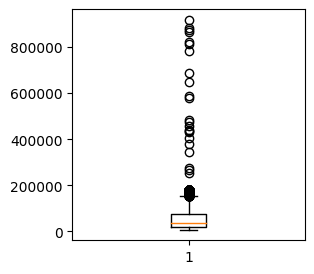

In [29]:
plt.figure(figsize=(3,3))
plt.boxplot(df.Annual_Income.loc[df.Annual_Income<=1000000])
plt.show()

In [30]:
# Outliers => Cutoff at 200,000 US Dollars

print(df.Annual_Income.loc[df.Annual_Income>=200000].__len__())

df = df.loc[df.Annual_Income<=200000]
df.reset_index(drop=True, inplace=True)
df.shape

629


(63740, 15)

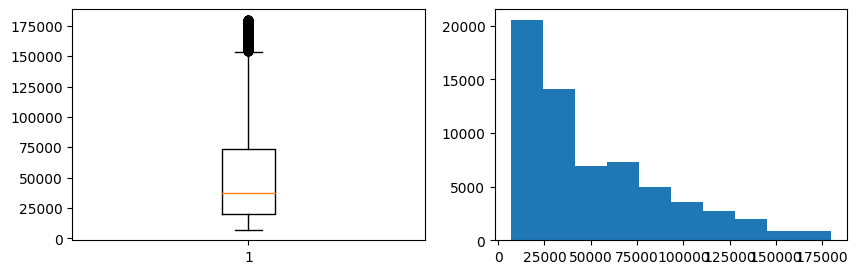

In [31]:
# Not bad for now

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Annual_Income)

plt.subplot(1, 2, 2)
plt.hist(df.Annual_Income)

plt.show()

---

## 7. Num_Bank_Accounts

In [32]:
# Number of bank accounts distribution

df.Num_Bank_Accounts.value_counts(normalize=True, bins=5)

(-2.8, 358.8]       0.989253
(718.6, 1078.4]     0.002777
(1438.2, 1798.0]    0.002730
(1078.4, 1438.2]    0.002636
(358.8, 718.6]      0.002604
Name: Num_Bank_Accounts, dtype: float64

In [33]:
# Under 100

df.Num_Bank_Accounts.loc[df.Num_Bank_Accounts<=100].value_counts(normalize=True, bins=5)

(-1.101, 19.0]    0.999396
(19.0, 39.0]      0.000270
(39.0, 59.0]      0.000127
(59.0, 79.0]      0.000111
(79.0, 99.0]      0.000095
Name: Num_Bank_Accounts, dtype: float64

In [34]:
# Drop outliers

df = df.loc[df.Num_Bank_Accounts < 12]
df.shape

(62888, 15)

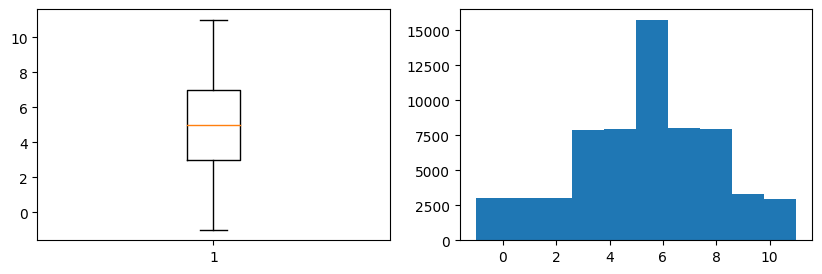

In [35]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_Bank_Accounts)

plt.subplot(1, 2, 2)
plt.hist(df.Num_Bank_Accounts)

plt.show()

---

## 8. Num_Credit_Card

In [36]:
# Number of credit card distribution

df.Num_Credit_Card.value_counts(normalize=True, bins=5)

(-1.5, 299.8]       0.982079
(599.6, 899.4]      0.004786
(899.4, 1199.2]     0.004436
(299.8, 599.6]      0.004421
(1199.2, 1499.0]    0.004277
Name: Num_Credit_Card, dtype: float64

In [37]:
# Under 100

df.Num_Credit_Card.loc[df.Num_Credit_Card<=100].value_counts(normalize=True, bins=5)

(-0.101, 20.0]    0.998570
(20.0, 40.0]      0.000422
(60.0, 80.0]      0.000406
(80.0, 100.0]     0.000341
(40.0, 60.0]      0.000260
Name: Num_Credit_Card, dtype: float64

In [38]:
# Drop outliers

df = df.loc[df.Num_Credit_Card <= 20]
df.shape

(61455, 15)

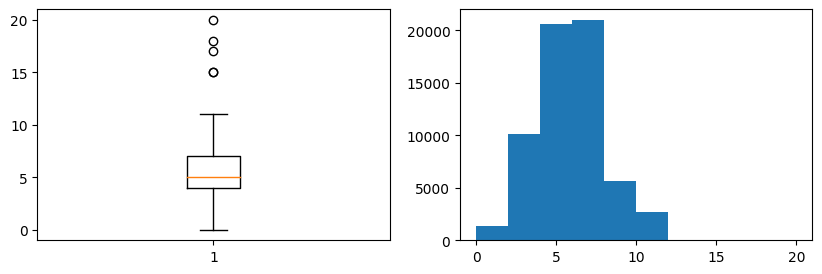

In [39]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_Credit_Card)

plt.subplot(1, 2, 2)
plt.hist(df.Num_Credit_Card)

plt.show()

---

## 9. Interest_Rate

In [40]:
print(df.Interest_Rate.dtype)

# Interest rate distribution

df.Interest_Rate.value_counts(normalize=True, bins=5)

int64


(-4.797000000000001, 1160.2]    0.983061
(3478.6, 4637.8]                0.004638
(1160.2, 2319.4]                0.004198
(4637.8, 5797.0]                0.004068
(2319.4, 3478.6]                0.004035
Name: Interest_Rate, dtype: float64

In [41]:
# Under 100

df.Interest_Rate.loc[df.Interest_Rate<=100].value_counts(normalize=True, bins=5)

(0.9, 20.8]      0.789322
(20.8, 40.6]     0.210396
(60.4, 80.2]     0.000133
(80.2, 100.0]    0.000133
(40.6, 60.4]     0.000017
Name: Interest_Rate, dtype: float64

In [42]:
# Drop outliers

df = df.loc[df.Interest_Rate <= 41]
df.shape

(60160, 15)

In [43]:
# Interest_Rate column seems like it is written in percentage => Divide it by 100

df.Interest_Rate = df.Interest_Rate.map(lambda x : x / 100)
df.Interest_Rate.head()

0    0.03
1    0.03
2    0.03
3    0.03
4    0.06
Name: Interest_Rate, dtype: float64

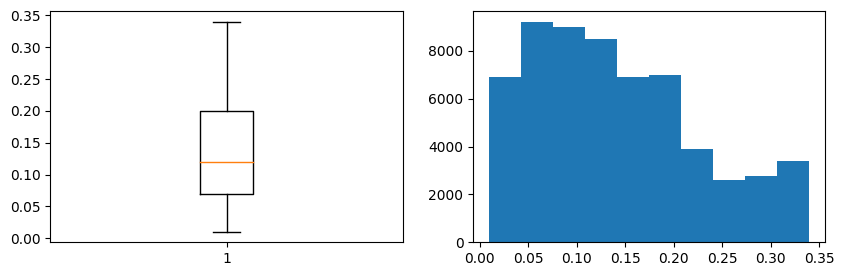

In [44]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Interest_Rate)

plt.subplot(1, 2, 2)
plt.hist(df.Interest_Rate)

plt.show()

---

## 10. Num_of_Loan

In [45]:
print(df.Num_of_Loan.dtype)

object


In [46]:
# Leave only integer

df.Num_of_Loan = df.Num_of_Loan.map(lambda x: int(''.join(re.findall(r'\d+', x))))
df.Num_of_Loan.value_counts(normalize=True, bins=5)

(-1.4809999999999999, 296.0]    0.996459
(1184.0, 1480.0]                0.000997
(888.0, 1184.0]                 0.000881
(296.0, 592.0]                  0.000848
(592.0, 888.0]                  0.000814
Name: Num_of_Loan, dtype: float64

In [47]:
# Under 100

df.Num_of_Loan.loc[df.Num_of_Loan<=100].value_counts(normalize=True, bins=5).sort_index()

(-0.101, 20.0]    0.960387
(20.0, 40.0]      0.000083
(40.0, 60.0]      0.000150
(60.0, 80.0]      0.000033
(80.0, 100.0]     0.039346
Name: Num_of_Loan, dtype: float64

In [48]:
# Drop outliers

df = df.loc[df.Num_of_Loan <= 21]
df.shape

(57532, 15)

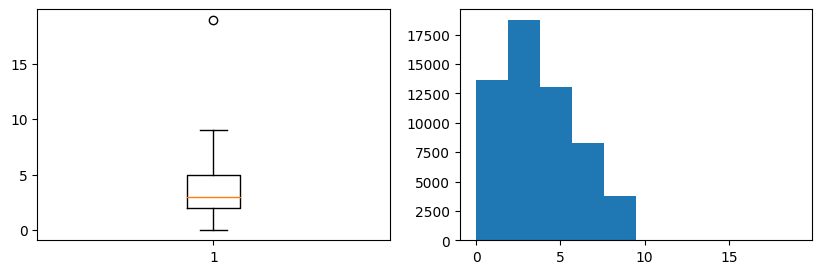

In [49]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_of_Loan)

plt.subplot(1, 2, 2)
plt.hist(df.Num_of_Loan)

plt.show()

---

## 11. Delay_from_due_date

In [50]:
df.Delay_from_due_date.unique()

array([ 3,  5,  8,  7, 13,  0,  1,  9, 10, -1, 30, 31, 14, 11,  2, -2, 16,
       17,  4, 15, 23, 22, 12, 18, 19, 51, 53, 48, 43, 52, 25, 20, 46, 49,
       61, 26, 29, 28, 45,  6, 55, 56, 59, 27, 62, 54, 57, 21, 24, 65, 41,
       39, 47, 33, 35, 34, 36, 38, 60, 63, 42, 50, 44, 40, 64, 32, 37, -3,
       -5, 58, -4, 66, 67])

In [51]:
df.Delay_from_due_date.dtype

dtype('int64')

In [52]:
# Change negative values to 0
# Reason: This column represents the average number of days delayed from the payment date.
# If you're average is negative, it means there was no delay (Early payment) = 0

df.Delay_from_due_date = df.Delay_from_due_date.map(lambda x : 0 if x < 0 else x)
df.Delay_from_due_date.unique()

array([ 3,  5,  8,  7, 13,  0,  1,  9, 10, 30, 31, 14, 11,  2, 16, 17,  4,
       15, 23, 22, 12, 18, 19, 51, 53, 48, 43, 52, 25, 20, 46, 49, 61, 26,
       29, 28, 45,  6, 55, 56, 59, 27, 62, 54, 57, 21, 24, 65, 41, 39, 47,
       33, 35, 34, 36, 38, 60, 63, 42, 50, 44, 40, 64, 32, 37, 58, 66, 67])

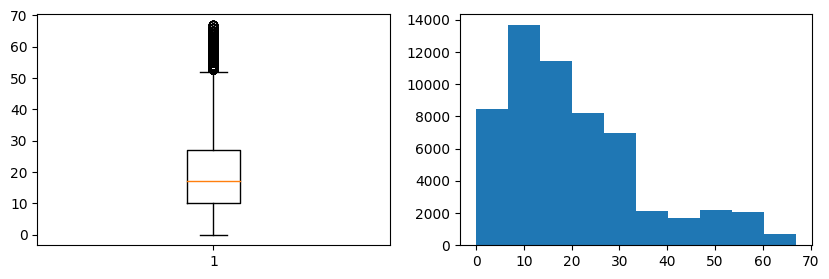

In [53]:
# Looks Alright

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Delay_from_due_date)

plt.subplot(1, 2, 2)
plt.hist(df.Delay_from_due_date)

plt.show()

---

## 12. Num_of_Delayed_Payment

In [54]:
# NOTE: This column is very similar to one above (Delay_from_due_date). Might drop it later.

In [55]:
df.Num_of_Delayed_Payment.unique()

array(['7', '4', '8_', '1', '3_', '0', '6', '3', '9', '15', '17', '2',
       '14', '11', '8', '20', '22', '10', '13', '13_', '14_', '16', '12',
       '12_', '18', '19', '23', '21', '3318', '3083', '1338', '24', '5',
       '25', '183_', '-1', '22_', '19_', '23_', '2672', '20_', '4_',
       '2008', '538', '10_', '1_', '16_', '3478', '2420', '15_', '707',
       '26_', '18_', '11_', '26', '28', '17_', '27', '5_', '-2', '1867',
       '2250', '1463', '-3', '7_', '1941', '306', '9_', '0_', '6_',
       '3539', '3684', '1823', '1946', '827', '2297', '2566', '2503',
       '2812', '1697', '851', '3905', '923', '1668', '3253', '21_',
       '2689', '3858', '642', '3457', '3154', '3037', '3103', '1063',
       '2569_', '25_', '211', '793', '3484', '3491', '2_', '3050', '2162',
       '27_', '1718', '3855', '84', '3251', '1832', '4069', '3010', '733',
       '4241', '166', '24_', '2461', '1749', '3200', '2185', '4161',
       '3009', '359', '2015', '1523', '594', '1199', '1015', '281', '559'

In [56]:
# Leave only integer

df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.map(lambda x: int(''.join(re.findall(r'\d+', x))))

In [57]:
df.Num_of_Delayed_Payment.value_counts(normalize=True, bins=5)

(-4.398000000000001, 879.4]    0.993499
(1758.8, 2638.2]               0.001895
(879.4, 1758.8]                0.001547
(2638.2, 3517.6]               0.001530
(3517.6, 4397.0]               0.001530
Name: Num_of_Delayed_Payment, dtype: float64

In [58]:
# Under 100

df.Num_of_Delayed_Payment.loc[df.Num_of_Delayed_Payment<=100].value_counts(normalize=True, bins=5).sort_index()

(-0.095, 18.8]    0.780982
(18.8, 37.6]      0.218913
(37.6, 56.4]      0.000018
(56.4, 75.2]      0.000018
(75.2, 94.0]      0.000070
Name: Num_of_Delayed_Payment, dtype: float64

In [59]:
df.shape

(57532, 15)

In [60]:
# Drop outliers

df = df.loc[df.Num_of_Delayed_Payment <= 28]
df.shape

(57076, 15)

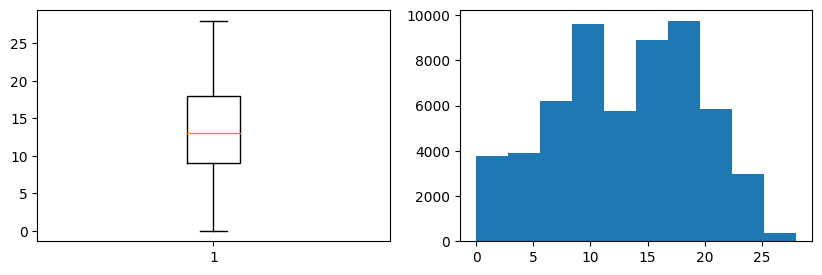

In [61]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_of_Delayed_Payment)

plt.subplot(1, 2, 2)
plt.hist(df.Num_of_Delayed_Payment)

plt.show()

---

## 13. Num_Credit_Inquiries

In [62]:
# Change floats to integer

print(df.Num_Credit_Inquiries.dtype)
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.astype(int)

float64


In [63]:
df.Num_Credit_Inquiries.value_counts(normalize=True, bins=5)

(-2.593, 518.4]     0.986509
(1036.8, 1555.2]    0.003942
(518.4, 1036.8]     0.003364
(2073.6, 2592.0]    0.003311
(1555.2, 2073.6]    0.002873
Name: Num_Credit_Inquiries, dtype: float64

In [64]:
# Under 100

df.Num_Credit_Inquiries.loc[df.Num_Credit_Inquiries<=100].value_counts(normalize=True, bins=5).sort_index()

(-0.088, 17.4]    0.999537
(17.4, 34.8]      0.000071
(34.8, 52.2]      0.000089
(52.2, 69.6]      0.000160
(69.6, 87.0]      0.000142
Name: Num_Credit_Inquiries, dtype: float64

In [65]:
df.shape

(57076, 15)

In [66]:
# Drop outliers

df = df.loc[df.Num_Credit_Inquiries <= 16]
df.shape

(55979, 15)

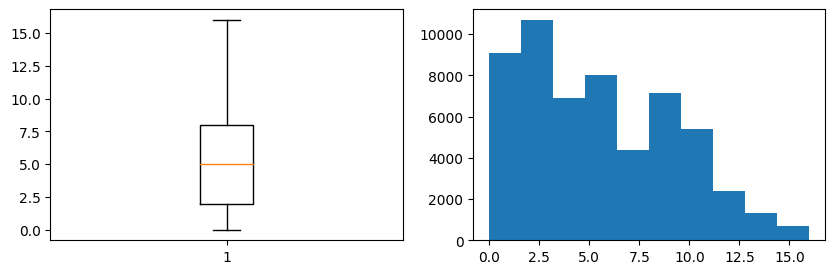

In [67]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_Credit_Inquiries)

plt.subplot(1, 2, 2)
plt.hist(df.Num_Credit_Inquiries)

plt.show()

---

## 14. Credit_Mix

In [68]:
df.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [69]:
# Null Values

df.loc[df.Credit_Mix == '_'].__len__()

11466

In [70]:
df.shape

(55979, 15)

In [71]:
# NOTE Should I drop this? There are many observations... Let's drop it for now

df = df.loc[df.Credit_Mix != '_']
df.shape

(44513, 15)

In [72]:
# Reset Index (Rows have been manipulated)

df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=44513, step=1)

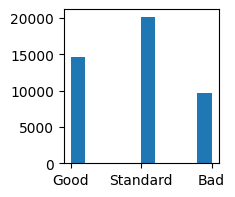

In [73]:
plt.figure(figsize=(2,2))
plt.hist(df.Credit_Mix)
plt.show()

---

## 15. Outstanding_Debt

In [74]:
df.Outstanding_Debt.unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [75]:
# Leave only the numbers and decimal point
# Round it to integer

df.Outstanding_Debt = df.Outstanding_Debt.map(lambda x: int(float(''.join(re.findall(r'\d+\.\d+', x)))))

In [76]:
# No huge outliers...

df.Outstanding_Debt.value_counts(normalize=True, bins=5).sort_index()

(-4.9990000000000006, 999.6]    0.452699
(999.6, 1999.2]                 0.327208
(1999.2, 2998.8]                0.119538
(2998.8, 3998.4]                0.051738
(3998.4, 4998.0]                0.048817
Name: Outstanding_Debt, dtype: float64

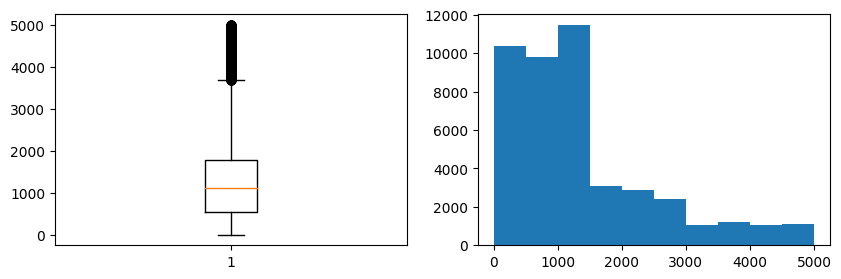

In [77]:
# Looks Alright

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Outstanding_Debt)

plt.subplot(1, 2, 2)
plt.hist(df.Outstanding_Debt)

plt.show()

In [78]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Credit_Score'],
      dtype='object')

---

## 16. Credit_Utilization_Ratio

In [79]:
df.Credit_Utilization_Ratio.dtype

dtype('float64')

In [80]:
# Divide by 100 and round it to the 100th

df.Credit_Utilization_Ratio = df.Credit_Utilization_Ratio.map(lambda x : round(x/100, ndigits=2))

In [81]:
df.Credit_Utilization_Ratio.unique()

array([0.31, 0.27, 0.23, 0.39, 0.35, 0.33, 0.42, 0.38, 0.32, 0.41, 0.29,
       0.26, 0.3 , 0.43, 0.28, 0.37, 0.36, 0.4 , 0.25, 0.34, 0.45, 0.24,
       0.44, 0.46, 0.22, 0.2 , 0.21, 0.5 , 0.47, 0.48])

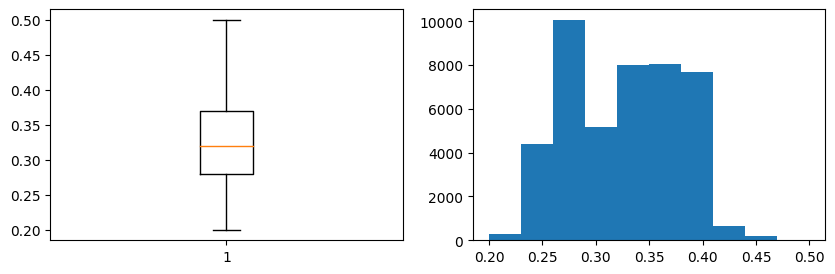

In [82]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Credit_Utilization_Ratio)

plt.subplot(1, 2, 2)
plt.hist(df.Credit_Utilization_Ratio)

plt.show()

---

## 17. Credit_History_Age

In [83]:
df.Credit_History_Age.head()

0     22 Years and 4 Months
1     22 Years and 6 Months
2     22 Years and 7 Months
3     26 Years and 8 Months
4    26 Years and 10 Months
Name: Credit_History_Age, dtype: object

In [84]:
# Change '00 Years and 00 Months' to integer which represents the calculated month.

df.Credit_History_Age = df.Credit_History_Age.map(lambda x : ((int(str(x).split()[0]) * 12) + int(str(x).split()[3])))

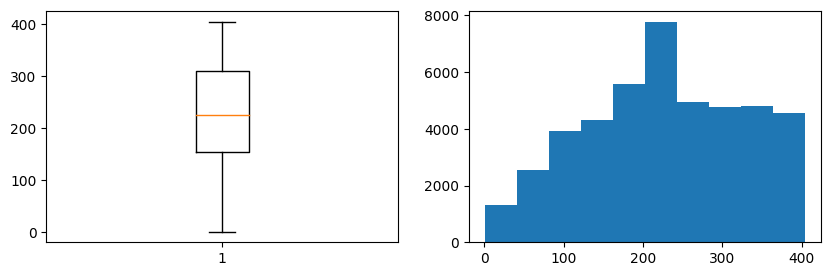

In [85]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Credit_History_Age)

plt.subplot(1, 2, 2)
plt.hist(df.Credit_History_Age)

plt.show()

---

## 18. Credit Score

FINALLY, THE DEPENDENT VARIABLE!

In [88]:
df.Credit_Score.value_counts()

Standard    23727
Poor        12368
Good         8418
Name: Credit_Score, dtype: int64

In [92]:
df = df.loc[df.Credit_Score.isin(['Good', 'Poor'])]
df.Credit_Score.value_counts()

Poor    12368
Good     8418
Name: Credit_Score, dtype: int64

In [93]:
# Reset Index (Rows have been manipulated)

df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=20786, step=1)

In [94]:
# Change 'Credit_Score' dependent variable into a discrete variable
# 1 - Good
# 0 - Poor

df.Credit_Score = df.Credit_Score.map(lambda x : 1 if x=='Good' else 0)
df.Credit_Score.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit_Score, dtype: int64

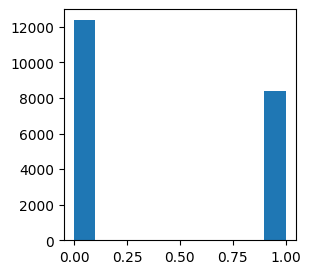

In [95]:
# Looks Good

plt.figure(figsize=(3,3))

plt.hist(df.Credit_Score)

plt.show()

---

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20786 entries, 0 to 20785
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       20786 non-null  int64  
 1   Occupation                20786 non-null  object 
 2   Annual_Income             20786 non-null  int64  
 3   Num_Bank_Accounts         20786 non-null  int64  
 4   Num_Credit_Card           20786 non-null  int64  
 5   Interest_Rate             20786 non-null  float64
 6   Num_of_Loan               20786 non-null  int64  
 7   Delay_from_due_date       20786 non-null  int64  
 8   Num_of_Delayed_Payment    20786 non-null  int64  
 9   Num_Credit_Inquiries      20786 non-null  int64  
 10  Credit_Mix                20786 non-null  object 
 11  Outstanding_Debt          20786 non-null  int64  
 12  Credit_Utilization_Ratio  20786 non-null  float64
 13  Credit_History_Age        20786 non-null  int64  
 14  Credit

In [97]:
# NOTE 3 Categorical Variables and 12 Numerical Variables
#      5610 Observations and No missing values

In [98]:
df.to_csv('data/cleaned_credit_data3.csv', index=False)

In [99]:
pd.read_csv('data/cleaned_credit_data3.csv')

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,23,Scientist,19114,3,4,0.03,4,5,4,4,Good,809,0.31,268,1
1,23,Scientist,19114,3,4,0.03,4,8,4,4,Good,809,0.27,270,1
2,23,Scientist,19114,3,4,0.03,4,3,8,4,Good,809,0.23,271,1
3,28,Teacher,34847,2,4,0.06,1,7,1,2,Good,605,0.39,320,1
4,28,Teacher,34847,2,4,0.06,1,3,3,2,Good,605,0.39,322,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20781,50,Writer,37188,1,4,0.05,3,7,13,3,Good,620,0.39,363,1
20782,28,Architect,20002,10,8,0.29,5,35,26,9,Bad,3571,0.23,68,0
20783,28,Architect,20002,10,8,0.29,5,33,25,9,Bad,3571,0.40,69,0
20784,28,Architect,20002,10,8,0.29,5,33,25,9,Bad,3571,0.25,70,0


# DONE